In [61]:
from IPython import display as disp
import librosa
import soundfile as sf

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
DATA_PATH = '/Users/timur/Downloads/audio_dataset'

In [3]:
df = pd.read_csv(f'{DATA_PATH}/df.csv') 

In [4]:
df.head(3)

,text,audio_id,worker_id,status,version,pool_id,task_id,path,duration,frames,rate
0,"По его словам, на вчерашний вечер у Донбанка «...",2e5fc762-6b7c-4168-8dfd-44e90e908de3,bd83ddb2596e455951c3838ed9061b84,APPROVED,1,12233816,0000baac58--5e813e8b44e47001255de14a,audio_files/2e5fc762-6b7c-4168-8dfd-44e90e908d...,13.02,208320.0,16000.0
1,"Этот процесс так захватывает человека, что он ...",93b47a6a-504c-41e8-b420-1ed5b8360d0d,bd83ddb2596e455951c3838ed9061b84,APPROVED,1,12233816,0000baac58--5e813e8b44e47001255de14a,audio_files/93b47a6a-504c-41e8-b420-1ed5b8360d...,15.02,240320.0,16000.0
2,Это крупнейшее левое движение Западного полуша...,19588ca3-9249-43cd-bc55-374432dffdbd,bd83ddb2596e455951c3838ed9061b84,APPROVED,1,12233816,0000baac58--5e813e8b44e47001255de14a,audio_files/19588ca3-9249-43cd-bc55-374432dffd...,15.48,247680.0,16000.0


In [68]:
sample = df.sample()

In [69]:
path = f"{DATA_PATH}/{sample['path'].item()}"

In [70]:
disp.display(disp.Audio(path))
print(sample['text'].item())

Хизер убрала деревянную стену дома с северной стороны и заменила ее большими панорамными окнами из оргстекла.


In [71]:
wav, sr = librosa.load(path)

In [72]:
wav.shape

(274302,)

In [73]:
def plot_waveform(wav: np.ndarray, sr: int, figsize=(20, 5)):
    _, ax = plt.subplots(figsize=figsize)
    librosa.display.waveshow(wav, sr=sr, axis="time", ax=ax)

In [74]:
def plot_mel(wav: np.ndarray, sr: int, figsize=(20, 5)):
    _, ax = plt.subplots(figsize=figsize)
    S = librosa.feature.melspectrogram(y=wav, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), ax=ax)

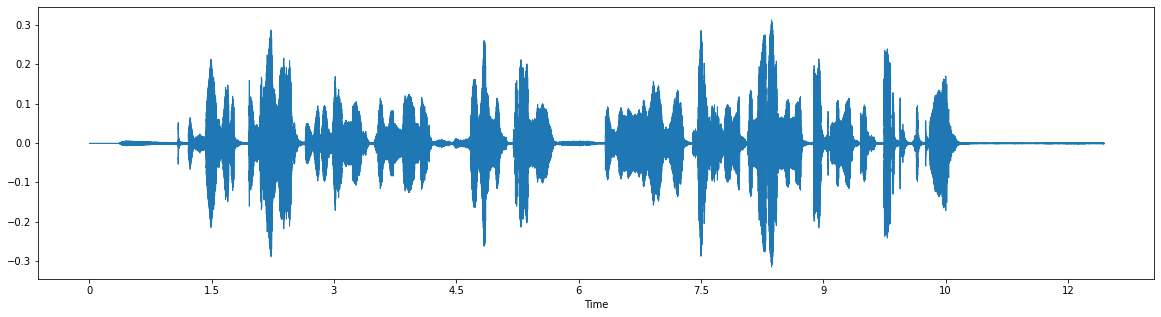

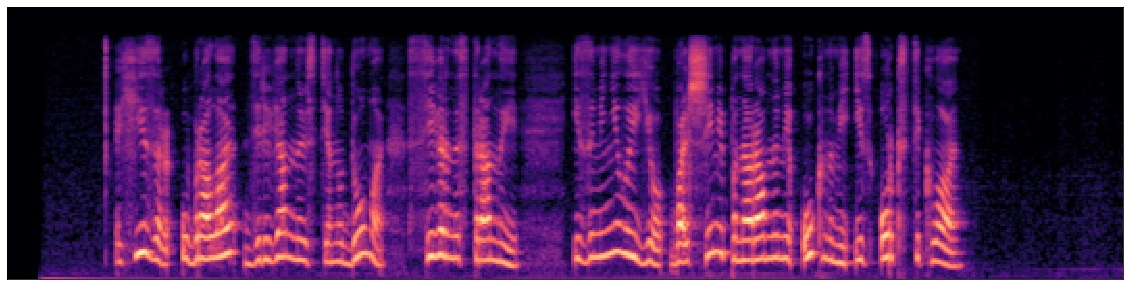

In [75]:
plot_waveform(wav, sr)
plot_mel(wav, sr)

In [76]:
def add_white_noise(signal, noise_percentage_factor=0.2):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

In [77]:
noised_wav = add_white_noise(wav)
noised_audio_path = 'noised.wav'
sf.write(noised_audio_path, noised_wav, sr)
disp.display(disp.Audio(noised_audio_path))

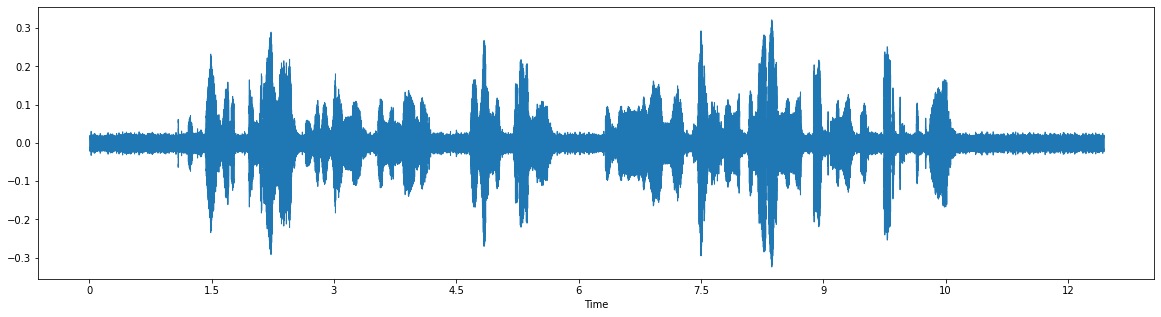

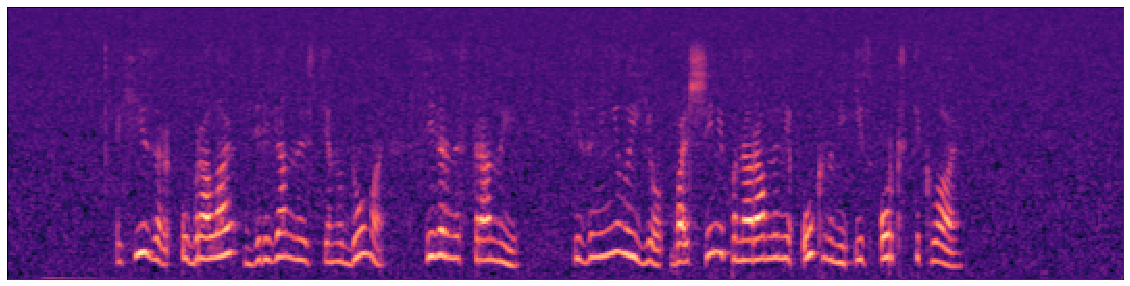

In [79]:
plot_waveform(noised_wav, sr)
plot_mel(noised_wav, sr)

In [80]:
S = librosa.feature.melspectrogram(y=wav, sr=sr)
mel = librosa.power_to_db(S, ref=np.max)

In [82]:
mel.shape

(128, 536)